**IMAGE** **AUGUMENTATION**

In [1]:
!pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [16]:
import splitfolders
# To only split into training and validation set, set a tuple to `ratio`, i.e, `(.8, .2)`.
splitfolders.ratio("/content/drive/MyDrive/flowers", output="/content/drive/MyDrive/flowers",seed=1337, ratio=(.8, .1, .1), group_prefix=None, move=False) 


Copying files: 0 files [00:00, ? files/s]
Copying files: 1 files [00:00,  4.64 files/s]
Copying files: 9 files [00:00, 34.09 files/s]
Copying files: 14 files [00:01,  8.26 files/s]
Copying files: 21 files [00:01, 14.17 files/s]
Copying files: 29 files [00:01, 21.94 files/s]
Copying files: 37 files [00:01, 30.06 files/s]
Copying files: 48 files [00:01, 42.82 files/s]
Copying files: 56 files [00:02, 48.78 files/s]
Copying files: 64 files [00:02, 54.68 files/s]
Copying files: 75 files [00:02, 66.06 files/s]
Copying files: 84 files [00:02, 69.76 files/s]
Copying files: 94 files [00:02, 73.97 files/s]
Copying files: 105 files [00:02, 81.52 files/s]
Copying files: 114 files [00:02, 80.02 files/s]
Copying files: 123 files [00:02, 82.13 files/s]
Copying files: 132 files [00:02, 76.22 files/s]
Copying files: 140 files [00:03, 76.39 files/s]
Copying files: 152 files [00:03, 81.21 files/s]
Copying files: 163 files [00:03, 87.07 files/s]
Copying files: 172 files [00:03, 84.83 files/s]
Copying fil

In [27]:
import keras
from keras.preprocessing.image import ImageDataGenerator

In [28]:
def getdata():
  train_datagen=ImageDataGenerator (rescale=1./255,
  shear_range=0.2,
  rotation_range=180,
  zoom_range=0.2,
  horizontal_flip=True)
  test_datagen=ImageDataGenerator (rescale=1./255)
  x_train = train_datagen.flow_from_directory (r'/content/output/train', target_size = (64,64), batch_size = 32, class_mode= 'categorical')
  x_test = test_datagen.flow_from_directory(r'/content/output/test', target_size = (64,64), batch_size = 32, class_mode= 'categorical')
  return x_train,x_test;

**CREATE** **MODEL**

In [29]:
#To define linear intialisan
from keras.models import Sequential
#To add Layers import Dense
from keras.layers import Dense
#To create Convolution kernel import Convolution2D
from keras.layers import Convolution2D
#import Maxpooling layer
from keras.layers import MaxPooling2D
#import Flatten Layer
from keras.layers import Flatten
import warnings
warnings.filterwarnings('ignore')

In [30]:
model=Sequential()

**ADDING** **LAYERS**

In [31]:
#add convolutional layer 
model.add(Convolution2D(112, (7,7),input_shape=(64,64,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())

In [32]:
#add hidden layer 
model.add(Dense(32,activation='relu'))
model.add(Dense(64,activation='relu'))

**COMPILE** **THE** **MODEL**

In [33]:
#add output Layer 
model.add(Dense(5, activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = "adam", metrics = ["accuracy"])

In [34]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 58, 58, 112)       16576     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 29, 29, 112)      0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 94192)             0         
                                                                 
 dense_4 (Dense)             (None, 32)                3014176   
                                                                 
 dense_5 (Dense)             (None, 64)                2112      
                                                                 
 dense_6 (Dense)             (None, 5)                 325       
                                                      

**FIT** **THE** **MODEL**

In [36]:
x_train,x_test=getdata()
tom=model.fit_generator(x_train , steps_per_epoch=len(x_train), epochs=100, validation_data=x_test, validation_steps=len(x_test))

Found 3463 images belonging to 5 classes.
Found 506 images belonging to 5 classes.
Epoch 1/100
109/109 [==============================] - 44s 406ms/step - loss: 1.1920 - accuracy: 0.4973 - val_loss: 1.3547 - val_accuracy: 0.4531
Epoch 2/100
109/109 [==============================] - 44s 404ms/step - loss: 1.1537 - accuracy: 0.5299 - val_loss: 1.1252 - val_accuracy: 0.5938
Epoch 3/100
109/109 [==============================] - 44s 407ms/step - loss: 1.1497 - accuracy: 0.5261 - val_loss: 1.3031 - val_accuracy: 0.4453
Epoch 4/100
109/109 [==============================] - 43s 396ms/step - loss: 1.1235 - accuracy: 0.5334 - val_loss: 1.2084 - val_accuracy: 0.5234
Epoch 5/100
109/109 [==============================] - 49s 444ms/step - loss: 1.1239 - accuracy: 0.5458 - val_loss: 0.9888 - val_accuracy: 0.5859
Epoch 6/100
109/109 [==============================] - 45s 408ms/step - loss: 1.0538 - accuracy: 0.5712 - val_loss: 1.0753 - val_accuracy: 0.6016
Epoch 7/100
109/109 [====================

**SAVE** **THE** **MODEL**

In [38]:
model.save("/content/drive/MyDrive/flowermodel.h5")

**TEST** **THE** **MODEL**

In [39]:
import matplotlib.pyplot as plt

16/16 - 3s - loss: 1.0302 - accuracy: 0.6877 - 3s/epoch - 186ms/step


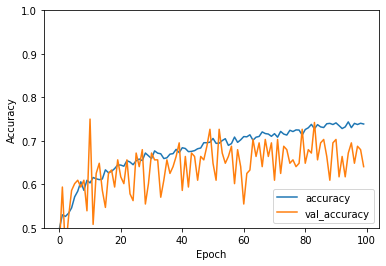

In [40]:
plt.plot(tom.history['accuracy'], label='accuracy')
plt.plot(tom.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test, verbose=2)

In [41]:
print(test_acc)

0.687747061252594
